In [22]:
from allennlp.modules.elmo import Elmo, batch_to_ids

options_file = "options.json" 
weight_file = "weights.hdf5" 

elmo = Elmo(options_file, weight_file, 1, dropout=0)

sentence_lists = [['I', 'love', 'you', '.'], ['Sorry', ',', 'I', 'don', "'t", 'love', 'you', '.']]

character_ids = batch_to_ids(sentence_lists)
embeddings = elmo(character_ids)['elmo_representations'][0]

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2, random_state=2526)

v1 = pca.fit_transform(embeddings[0].detach().numpy())
v2 = pca.fit_transform(embeddings[1].detach().numpy())
all_vec = np.concatenate((v1,v2), axis = 0)
flattened_list = ['I', 'love', 'you', '.', 'None', 'None', 'None', 'None', 'Sorry', ',', 'I', 'don', "'t", 'love', 'you', '.']

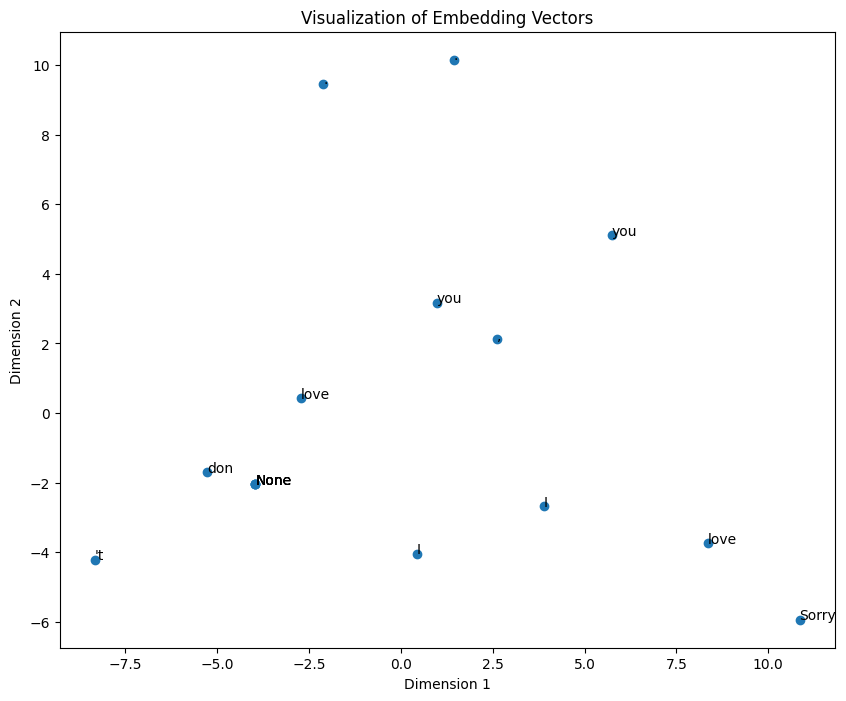

In [78]:
def visualization(embedding_matrix, flattened_list):
    # 提取降維後的坐標
    x_coords = embedding_matrix[:, 0]
    y_coords = embedding_matrix[:, 1]
    
    # 繪製詞嵌入向量的散點圖
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords)
    
    # 標註散點
    for i in range(len(embedding_matrix)):
        plt.annotate(flattened_list[i], (x_coords[i], y_coords[i]))
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Visualization of Embedding Vectors')
    plt.show()
visualization(all_vec, flattened_list)